### Домашние задания
1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss был минимальным. Покажите влияние гиперпараметров на ошибку алгоритма (оптимально здесь использовать критерий остановки обучения).
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`).
4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков `Х` и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred`).
5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. Могла ли модель переобучиться? Почему?
7. (\*) Создайте функции `eval_LR_model_l1` и `eval_LR_model_l2` с применением L1 и L2 регуляризации соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [4]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

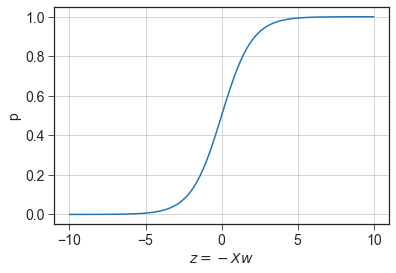

In [5]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=-Xw$')
plt.ylabel('p')
plt.grid();

### 1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`). 

In [6]:
def calc_logloss(y, y_pred):
    np.clip(y_pred, 1e-10, 1-1e-10)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика

In [8]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

### 2. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss был минимальным. Покажите влияние гиперпараметров на ошибку алгоритма (оптимально здесь использовать критерий остановки обучения).

In [9]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [10]:
w = eval_LR_model(X_st, y, 200000, 1e-1)

20000 [-16.2427091   -1.86940882  -3.90475531  13.50901763] 0.20874421725365072
40000 [-23.32991383  -2.48704062  -6.00960348  19.2582858 ] 0.16415855743912577
60000 [-28.46500332  -2.94026656  -7.50582736  23.41651039] 0.14096383462694595
80000 [-32.5184265   -3.29804548  -8.67615891  26.68956031] 0.12659210791842243
100000 [-35.8933164   -3.59426199  -9.64639296  29.4060647 ] 0.1166706079110005
120000 [-38.80669018  -3.84767407 -10.48265646  31.74315795] 0.109302883329543
140000 [-41.38751511  -4.06963396 -11.22360001  33.80618851] 0.10353931871544134
160000 [-43.71819424  -4.2674961  -11.89360808  35.66252022] 0.09885270324898006
180000 [-45.85436158  -4.44628574 -12.50897306  37.35767751] 0.0949267688466947
200000 [-47.83523093  -4.60958703 -13.08107424  38.92379106] 0.0915600471534308


In [11]:
y_pred = sigmoid(np.dot(X_st, w))
print(y_pred.round(2))
print(y)
calc_logloss(y, y_pred)

[0.33 0.   1.   0.03 0.97 0.01 1.   0.01 0.66 1.  ]
[0 0 1 0 1 0 1 0 1 1]


0.09155989035207399

### 3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`).

In [12]:
def calc_pred_proba (X, w, y):
    y_pred = sigmoid(np.dot(X, w))
    y_pred_proba=[]
    for i in range (0, len(y_pred)):
        if y[i] ==1 :
            y_pred_proba.append(y_pred[i].round(2).copy())

    return y_pred_proba

In [13]:
calc_pred_proba (X_st, w, y)

[1.0, 0.97, 1.0, 0.66, 1.0]

### 4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков `Х` и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred`).

In [14]:
def calc_pred (X, w):
    y_pred_1 = sigmoid(np.dot(X, w))
    y_pred = np.zeros(len(y_pred_1))
    for i in range (0, len(y_pred_1)):
        if y_pred_1[i] > 0.5 :
            y_pred[i] = 1
    return y_pred

In [15]:
y_pred = calc_pred(X_st, w)
y_pred, y

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

### 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
 слишком поздно сообразил как решить((((

### 6. Могла ли модель переобучиться? Почему? – модель переучилась, так как print(y)полностью совпала с y. переобучение произошло за счет подбора альфа=1е-1 и большого числа итераций =200 000